## <span style="color:red">Importing the libraries</span> 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from fancyimpute import IterativeImputer #missing value
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler #feature scaling
from sklearn.tree import DecisionTreeClassifier #Decision Tree

from sklearn.ensemble import RandomForestClassifier #Random Forest

from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBClassifier

## <span style="color:red">Load and Prepare Data</span> 

In [4]:
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
y_test = pd.read_csv('sampleSubmission.csv')

## <span style="color:red">EDA</span> 

In [6]:
y_train = X_train[["PassengerId","Survived"]]

In [7]:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (891, 12)
y_train : (891, 2)
X_test : (418, 11)
y_test : (418, 2)


In [8]:
print(f'X_train :\n{X_train.columns}\n\n')
print(f'y_train :\n{y_train.columns}\n\n')
print(f'X_test :\n{X_test.columns}\n\n')
print(f'y_test :\n{y_test.columns}')

X_train :
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


y_train :
Index(['PassengerId', 'Survived'], dtype='object')


X_test :
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


y_test :
Index(['PassengerId', 'Survived'], dtype='object')


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
X_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S


In [11]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
dtypes: int64(2)
memory usage: 14.1 KB


In [12]:
X_train.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
461,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.05,NaN,S
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.40,NaN,C
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.50,B79,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.90,NaN,S


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
X_train['Sex']=X_train['Sex'].map({'male':1,'female':0})

In [15]:
X_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [16]:
X_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
X_train[ -X_train.Cabin.isnull() ][['Age','Name','Sex','Cabin']][0:5]

,Age,Name,Sex,Cabin
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,C85
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,C123
6,54.0,"McCarthy, Mr. Timothy J",1,E46
10,4.0,"Sandstrom, Miss. Marguerite Rut",0,G6
11,58.0,"Bonnell, Miss. Elizabeth",0,C103


In [18]:
X_train[ -X_train.Cabin.isnull() ][:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S


In [19]:
X_train.drop(["Cabin","Ticket","Name"],axis=1, inplace=True)

In [20]:
X_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
Fare           248
Embarked         3
dtype: int64

In [21]:
X_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [22]:
X_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [23]:
X_train['Embarked']=X_train['Embarked'].map({'S':2,'C':1,'Q':0})

In [24]:
X_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [25]:
X_train[ X_train.Embarked.isnull() ][0:5]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,0,38.0,0,0,80.0,NaN
829,830,1,1,0,62.0,0,0,80.0,NaN


## <span style="color:red">X_train</span> (Multiple Imputation)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [28]:
X_train.sample(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
85,86,1,3,0,33.0,3,0,15.85,2.0


In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [30]:
X_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [31]:
X_train[ X_train.Age.isnull() ][["Sex","Age","SibSp","Parch","Fare","Pclass","Embarked"]][0:7]

,Sex,Age,SibSp,Parch,Fare,Pclass,Embarked
5,1,NaN,0,0,8.4583,3,0.0
17,1,NaN,0,0,13.0000,2,2.0
19,0,NaN,0,0,7.2250,3,1.0
26,1,NaN,0,0,7.2250,3,1.0
28,0,NaN,0,0,7.8792,3,0.0
29,1,NaN,0,0,7.8958,3,2.0
31,0,NaN,1,0,146.5208,1,1.0


In [32]:
features = X_train[["Sex","Age","SibSp","Parch","Fare","Pclass","Embarked"]]

imputer = IterativeImputer()
imputed_data = imputer.fit_transform(features)

imputed_X_train = pd.DataFrame(imputed_data, columns=features.columns)

X_train['Age'] = imputed_X_train['Age']
X_train['Embarked'] = imputed_X_train['Embarked']   

In [33]:
X_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [34]:
X_train.iloc[[5,17,19,26,28,29,31]]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,1,27.894615,0,0,8.4583,0.0
17,18,1,2,1,35.050858,0,0,13.0000,2.0
19,20,1,3,0,25.235245,0,0,7.2250,1.0
26,27,0,3,1,28.160561,0,0,7.2250,1.0
28,29,1,3,0,24.978235,0,0,7.8792,0.0
29,30,0,3,1,28.397127,0,0,7.8958,2.0
31,32,1,1,0,32.808092,1,0,146.5208,1.0


In [35]:
X_train["Embarked"].value_counts()

Embarked
2.000000    644
1.000000    168
0.000000     77
1.533322      1
1.558447      1
Name: count, dtype: int64

In [36]:
X_train['Embarked'] = X_train['Embarked'].apply(lambda x: round(x) if not x.is_integer() else x)
X_train[['Age','Fare']] = X_train[['Age','Fare']].round(2)

In [37]:
X_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [39]:
X_train.sample(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
867,868,0,1,1,31.0,0,0,50.5,2.0


In [40]:
X_train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

## <span style="color:red; font-size:24px">y_train</span>

In [42]:
y_train.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [43]:
y_train.nunique()

PassengerId    891
Survived         2
dtype: int64

In [44]:
y_train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## <span style="color:red; font-size:24px">X_test</span>

In [46]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [47]:
X_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
277,1169,2,"Faunthorpe, Mr. Harry",male,40.0,1,0,2926,26.0000,NaN,S
243,1135,3,"Hyman, Mr. Abraham",male,NaN,0,0,3470,7.8875,NaN,S
120,1012,2,"Watt, Miss. Bertha J",female,12.0,0,0,C.A. 33595,15.7500,NaN,S
114,1006,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S


In [48]:
X_test.drop(["Cabin","Ticket","Name"],axis=1, inplace=True)
X_test['Embarked']=X_test['Embarked'].map({'S':2,'C':1,'Q':0})
X_test['Sex']=X_test['Sex'].map({'male':1,'female':0})

In [49]:
X_test.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
305,1197,1,0,64.0,1,1,26.5500,2
334,1226,3,1,27.0,0,0,7.8958,2
327,1219,1,1,46.0,0,0,79.2000,1
229,1121,2,1,36.0,0,0,13.0000,2
177,1069,1,1,54.0,1,0,55.4417,1


In [50]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.3 KB


In [51]:
X_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [52]:
df7 = X_test.copy()

In [53]:
features = df7[["Sex","Age","SibSp","Parch","Fare","Pclass","Embarked"]]

imputer = IterativeImputer(min_value=0)
imputed_data = imputer.fit_transform(features)

imputed_df = pd.DataFrame(imputed_data, columns=features.columns)

df7['Age'] = imputed_df['Age']
df7['Fare'] = imputed_df['Fare']

In [54]:
df7[df7.Age <0][["Sex","Age","SibSp","Parch","Fare","Pclass","Embarked"]][0:20]

,Sex,Age,SibSp,Parch,Fare,Pclass,Embarked


In [55]:
X_test[ X_test.Age.isnull() ][["Sex","Age","SibSp","Parch","Fare","Pclass","Embarked"]][0:7]

,Sex,Age,SibSp,Parch,Fare,Pclass,Embarked
10,1,NaN,0,0,7.8958,3,2
22,0,NaN,0,0,31.6833,1,2
29,1,NaN,2,0,21.6792,3,1
33,0,NaN,1,2,23.4500,3,2
36,0,NaN,0,0,8.0500,3,2
39,1,NaN,0,0,56.4958,3,2
41,1,NaN,0,0,26.5500,1,2


In [56]:
df7.iloc[[10,22,29,33,36,39,41]]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
10,902,3,1,24.913789,0,0,7.8958,2
22,914,1,0,37.147586,0,0,31.6833,2
29,921,3,1,23.629264,2,0,21.6792,1
33,925,3,0,20.753357,1,2,23.4500,2
36,928,3,0,23.415513,0,0,8.0500,2
39,931,3,1,26.424166,0,0,56.4958,2
41,933,1,1,38.491123,0,0,26.5500,2


In [57]:
df7[['Age','Fare']] = df7[['Age','Fare']].round(2)

In [58]:
X_test = df7.copy()

In [59]:
X_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [60]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.3 KB


In [61]:
X_test['Embarked'].value_counts()

Embarked
2    270
1    102
0     46
Name: count, dtype: int64

## <span style="color:red; font-size:24px">y_test</span>

In [63]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [64]:
y_test.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [65]:
y_train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## <span style="color:red">Data Preprocessing</span> 

In [67]:
X = X_train.copy()
X.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
132,133,0,3,0,47.00,1,0,14.5,2.0
839,840,1,1,1,41.28,0,0,29.7,1.0
724,725,1,1,1,27.00,1,0,53.1,2.0


In [68]:
X.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.270595,0.523008,0.381594,32.204366,1.638608
std,257.353842,0.486592,0.836071,0.477990,13.636677,1.102743,0.806057,49.693414,0.635673
min,1.000000,0.000000,1.000000,0.000000,-7.140000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.120000,0.000000,0.000000,7.910000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.140000,0.000000,0.000000,14.450000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.330000,2.000000


In [69]:
X.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [70]:
X[['Age','SibSp','Parch','Fare']].describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.270595,0.523008,0.381594,32.204366
std,13.636677,1.102743,0.806057,49.693414
min,-7.140000,0.000000,0.000000,0.000000
25%,21.120000,0.000000,0.000000,7.910000
50%,28.140000,0.000000,0.000000,14.450000
75%,36.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.330000


In [71]:
X["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [72]:
X.groupby('Sex')['Age'].mean()

Sex
0    27.169427
1    30.414038
Name: Age, dtype: float64

In [73]:
d0 = X.groupby('Pclass').agg({'Age':'mean','SibSp': 'mean', 'Parch': 'mean', 'Fare': 'mean'})
d0

,Age,SibSp,Parch,Fare
Pclass,,,,
1,38.382037,0.416667,0.356481,84.154630
2,30.154348,0.402174,0.380435,20.662174
3,24.931120,0.615071,0.393075,13.675866


In [74]:
d1 = X.groupby('Pclass').agg({'SibSp': 'sum', 'Parch': 'sum', 'Fare': 'sum'})
d1

,SibSp,Parch,Fare
Pclass,,,
1,90,77,18177.40
2,74,70,3801.84
3,302,193,6714.85


In [75]:
d2 = X.groupby('Sex').agg({'Fare': 'sum'})
d3 = X.groupby('Sex').agg({'Fare': 'mean'})
d2['sum of Fare'],d2['mean of Fare'] = d2['Fare'],d3['Fare']
d2.drop(['Fare'],axis=1, inplace=True)
d2

,sum of Fare,mean of Fare
Sex,,
0,13966.70,44.479936
1,14727.39,25.524073


In [76]:
X.sample(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
346,347,1,2,0,40.0,0,0,13.0,2.0


In [77]:
d4 = X.groupby(['Sex','Survived']).count()
d4['Count'] = d4['PassengerId']
d4[['Count']]

Count
Sex Survived       
0   0            81
    1           233
1   0           468
    1           109

In [78]:
d4 = X.groupby(['Sex','Survived']).sum()
d4['Sum of Fare'] = d4['Fare']
d4[['Sum of Fare']]

Sum of Fare
Sex Survived             
0   0             1865.02
    1            12101.68
1   0            10277.83
    1             4449.56

In [79]:
pd.crosstab(X.Pclass, X.Embarked)

Embarked,0.0,1.0,2.0
Pclass,,,
1,2,85,129
2,3,17,164
3,72,66,353


In [80]:
pd.crosstab((X[X.Age >=18]).Pclass, (X[X.Age >=18]).Embarked)

Embarked,0.0,1.0,2.0
Pclass,,,
1,2,82,120
2,3,13,145
3,64,49,288


In [81]:
pd.crosstab((X[X.Age <10]).Pclass, (X[X.Age <10]).Embarked)

Embarked,0.0,1.0,2.0
Pclass,,,
1,0,0,3
2,0,2,15
3,4,7,38


In [82]:
pd.crosstab(X.Pclass, X.Sex)

Sex,0,1
Pclass,,
1,94,122
2,76,108
3,144,347


In [83]:
pd.crosstab(X.Embarked, X.Sex)

Sex,0,1
Embarked,,
0.0,36,41
1.0,73,95
2.0,205,441


In [84]:
X[X.Age <2][["Sex","Age","SibSp","Parch","Fare","Pclass","Embarked"]][0:7]

,Sex,Age,SibSp,Parch,Fare,Pclass,Embarked
78,1,0.83,0,2,29.00,2,2.0
159,1,-4.22,8,2,69.55,3,2.0
164,1,1.00,4,1,39.69,3,2.0
172,0,1.00,1,1,11.13,3,2.0
180,0,-7.14,8,2,69.55,3,2.0
183,1,1.00,2,1,39.00,2,2.0
201,1,-4.22,8,2,69.55,3,2.0


In [85]:
pd.crosstab(X[X.Survived == 1].Sex , X[X.Survived == 1].Pclass)

Pclass,1,2,3
Sex,,,
0,91,70,72
1,45,17,47


In [86]:
pd.crosstab(X[X.Survived == 0].Sex , X[X.Survived == 0].Pclass)

Pclass,1,2,3
Sex,,,
0,3,6,72
1,77,91,300


In [87]:
d2 = X.groupby('Sex').agg({'Fare': 'sum'})
d3 = X.groupby('Sex').agg({'Fare': 'mean'})
d2['sum of Fare'],d2['mean of Fare'] = d2['Fare'],d3['Fare']
d2.drop(['Fare'],axis=1, inplace=True)
d2

,sum of Fare,mean of Fare
Sex,,
0,13966.70,44.479936
1,14727.39,25.524073


In [88]:
X[X.Survived == 0].groupby('Sex')['Age'].mean()

Sex
0    23.227654
1    30.982628
Name: Age, dtype: float64

In [89]:
X[X.Survived == 1].groupby('Sex')['Age'].mean()

Sex
0    28.539742
1    27.972752
Name: Age, dtype: float64

In [90]:
pd.crosstab(X[X.Survived == 1].Parch , X[X.Survived == 1].SibSp)

SibSp,0,1,2,3,4
Parch,,,,,
0,163,64,4,2,0
1,25,34,6,0,0
2,21,12,2,2,3
3,1,1,1,0,0
5,0,1,0,0,0


In [91]:
pd.crosstab(X[X.Survived == 0].Parch , X[X.Survived == 0].SibSp)

SibSp,0,1,2,3,4,5,8
Parch,,,,,,,
0,374,59,12,0,0,0,0
1,13,23,1,7,9,0,0
2,8,7,2,5,6,5,7
3,0,2,0,0,0,0,0
4,1,3,0,0,0,0,0
5,2,2,0,0,0,0,0
6,0,1,0,0,0,0,0


In [92]:
pd.crosstab(X[X.Survived == 0].Pclass , X.Fare.min())

col_0,0.0
Pclass,
1,80
2,97
3,372


In [93]:
pd.crosstab(X[X.Survived == 1].Pclass , X.Fare.min())

col_0,0.0
Pclass,
1,136
2,87
3,119


In [94]:
crosstab_not_survived = pd.crosstab(X[X.Survived == 0].Pclass, X[X.Survived == 0].Fare)
crosstab_survived = pd.crosstab(X[X.Survived == 1].Pclass, X[X.Survived == 1].Fare)

min_0 = X[X.Survived == 0].groupby('Pclass')['Fare'].min()
max_0 = X[X.Survived == 0].groupby('Pclass')['Fare'].max()

min_1 = X[X.Survived == 1].groupby('Pclass')['Fare'].min()
max_1 = X[X.Survived == 1].groupby('Pclass')['Fare'].max()

combined = pd.concat([crosstab_not_survived, crosstab_survived], axis=1)

combined['Min Not Survived'], combined['Max Not Survived'], combined['Min Survived'], combined['Max Survived'] = min_0 , max_0 , min_1 , max_1

print(combined[['Min Not Survived', 'Max Not Survived' , 'Min Survived' ,'Max Survived' ]])

Fare    Min Not Survived  Max Not Survived  Min Survived  Max Survived
Pclass                                                                
1                    0.0            263.00         25.93        512.33
2                    0.0             73.50         10.50         65.00
3                    0.0             69.55          0.00         56.50


## <span style="color:red">Strorytelling - Visualization</span> 

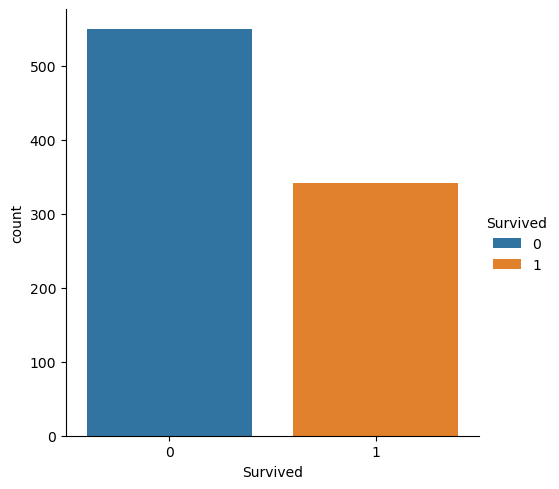

In [96]:
sns.catplot(y_train, x="Survived" ,hue="Survived", kind="count")

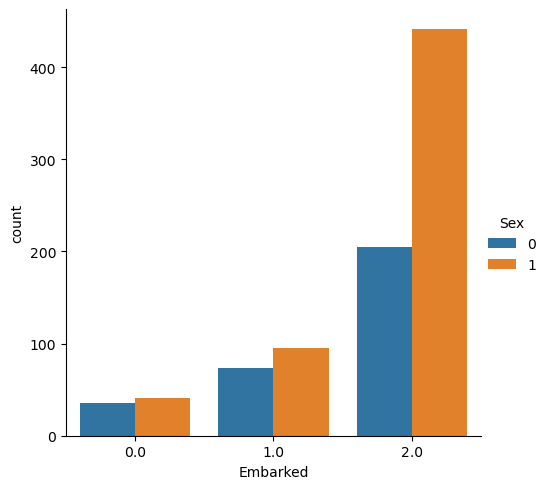

In [97]:
sns.catplot(x='Embarked', hue='Sex', kind='count', data=X)

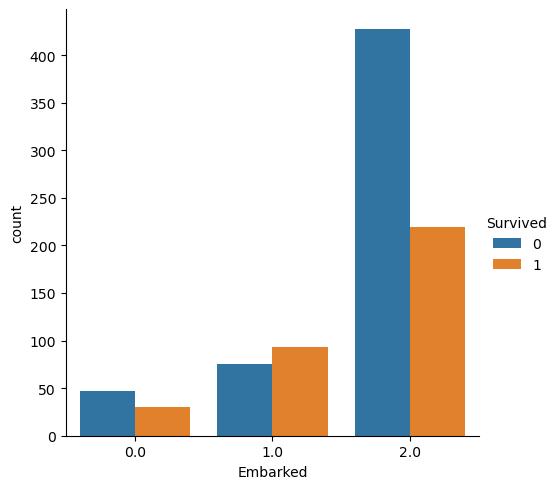

In [98]:
sns.catplot(x='Embarked', hue='Survived', kind='count', data=X)

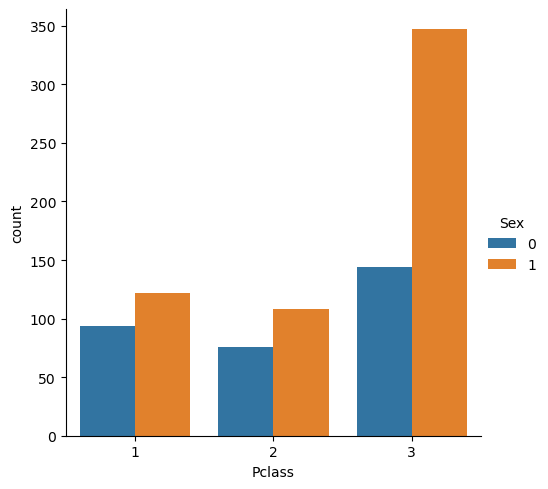

In [99]:
sns.catplot(x='Pclass', hue='Sex', kind='count', data=X)

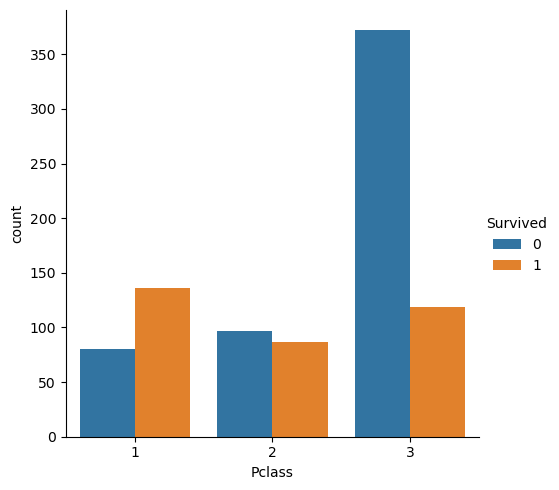

In [100]:
sns.catplot(x='Pclass', hue='Survived', kind='count', data=X)

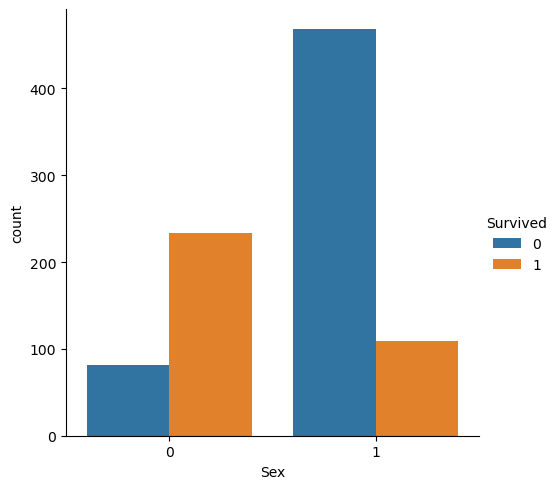

In [101]:
sns.catplot(x='Sex', hue='Survived', kind='count', data=X)

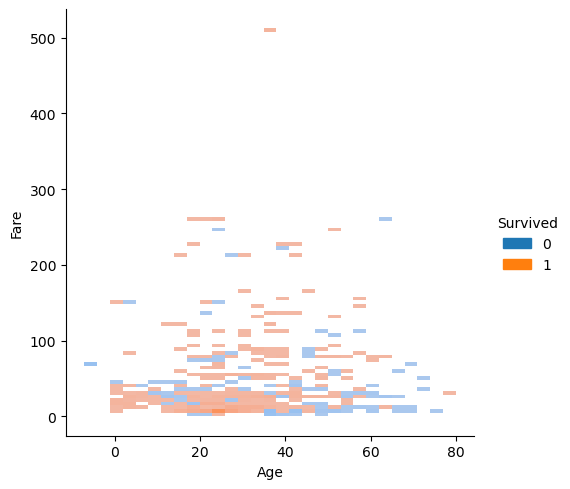

In [102]:
sns.displot(X, x="Age", y="Fare", hue='Survived', kind='hist')

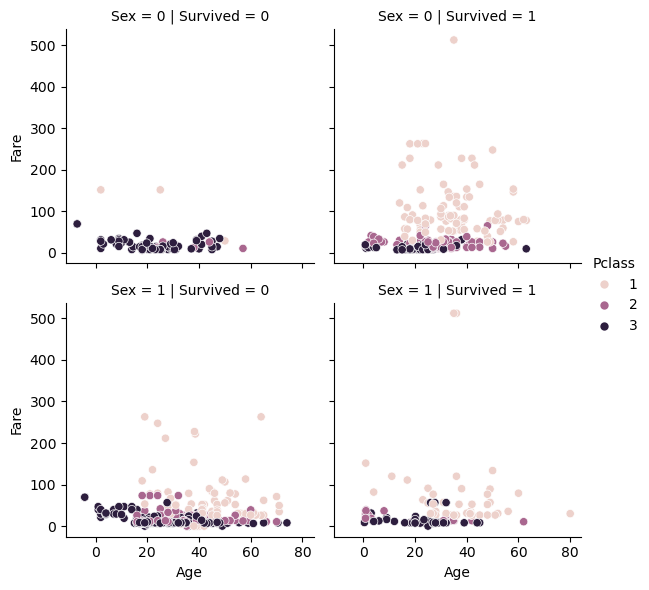

In [103]:
sns.relplot(X, x="Age", y="Fare", hue="Pclass", col="Survived", row="Sex" , height=3, aspect=1)

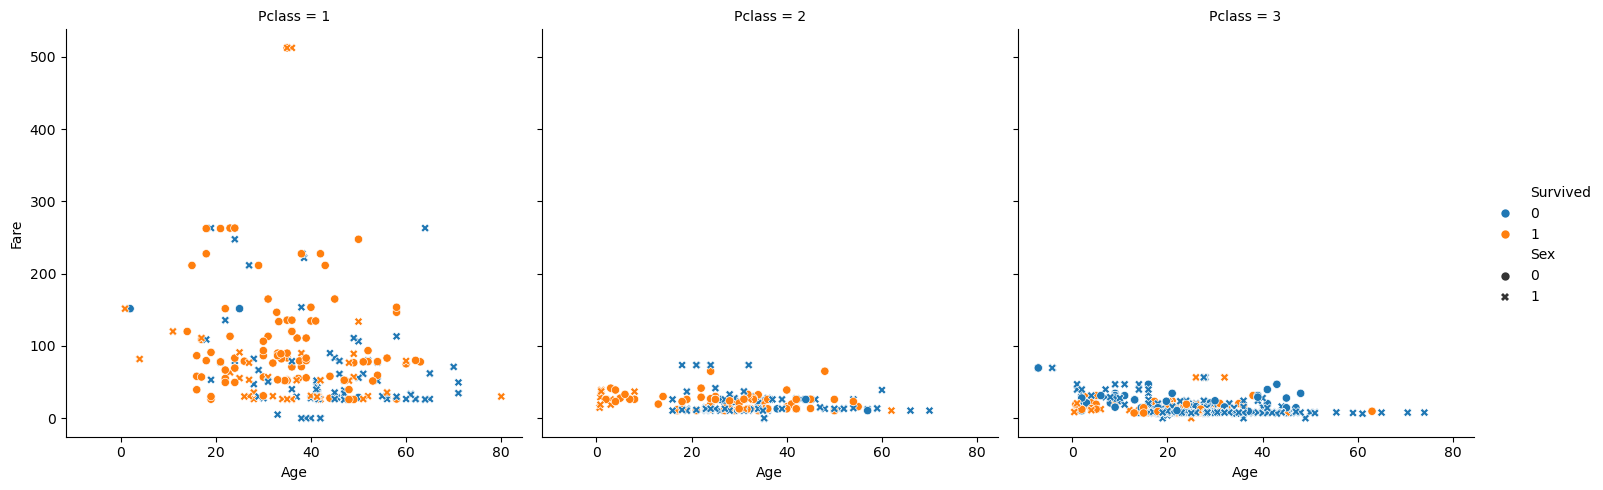

In [104]:
sns.relplot(X, x="Age", y="Fare", hue="Survived", style="Sex", col="Pclass", col_wrap=3)

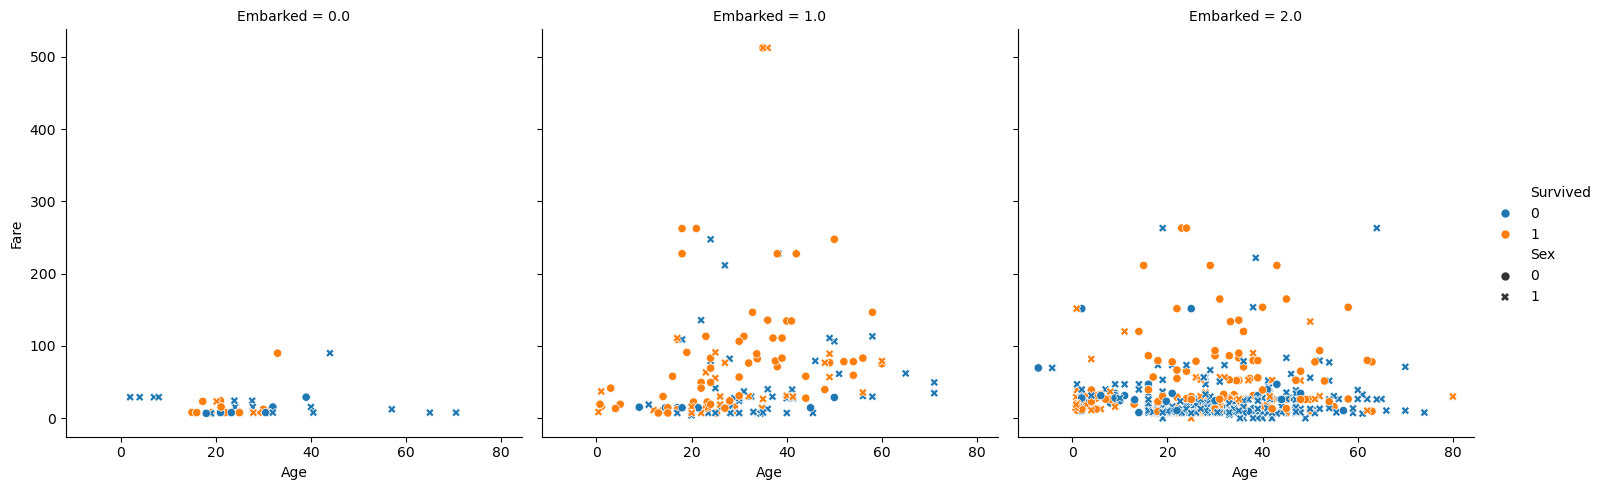

In [105]:
sns.relplot(X, x="Age", y="Fare", hue="Survived", style="Sex", col="Embarked", col_wrap=3)

<Axes: xlabel='Age', ylabel='Count'>

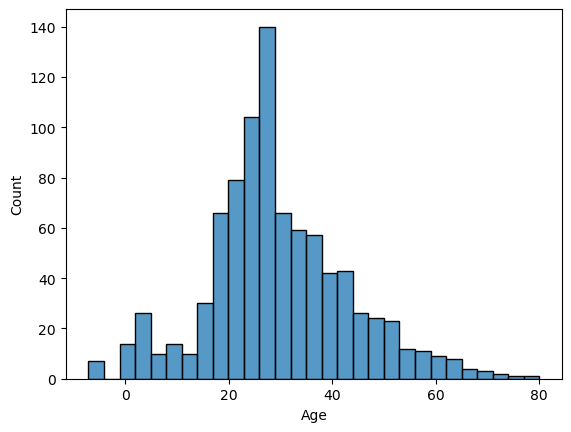

In [106]:
sns.histplot(X, x='Age')

<Axes: xlabel='Fare', ylabel='Count'>

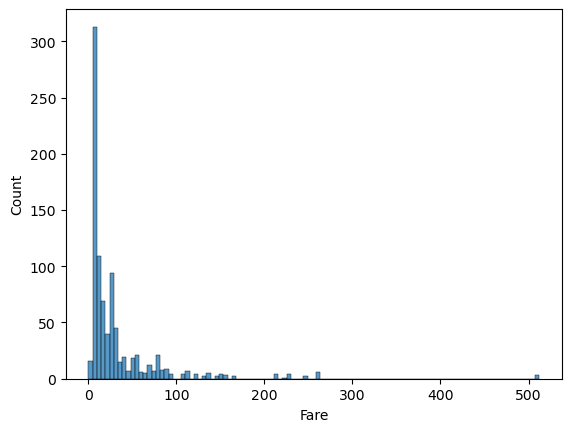

In [107]:
sns.histplot(X, x='Fare')

<Axes: xlabel='SibSp', ylabel='Count'>

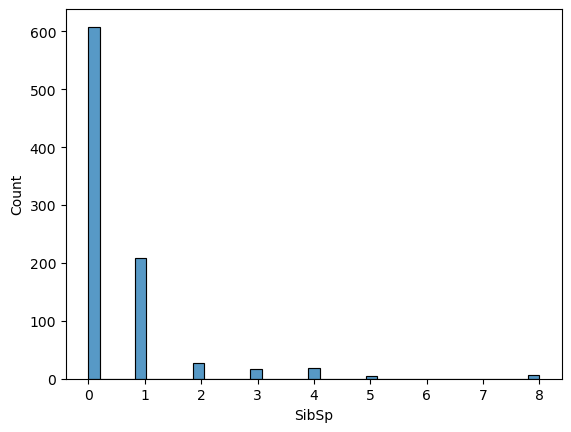

In [108]:
sns.histplot(X, x='SibSp')

<Axes: xlabel='Parch', ylabel='Count'>

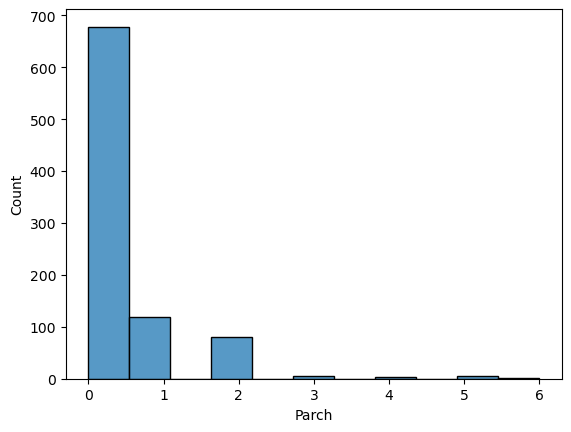

In [109]:
sns.histplot(X, x='Parch')

In [110]:
X.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [111]:
XX=X.drop(["PassengerId"],axis=1)


In [112]:
XX.sample(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
652,0,3,1,21.0,0,0,8.43,2.0


In [113]:
corr = XX.corr()
corr.shape

(8, 8)

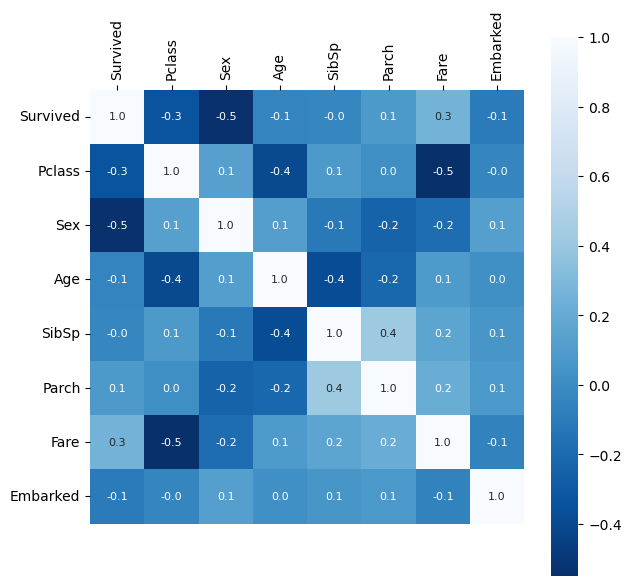

In [114]:
plt.figure(figsize=(7,7))
ax = sns.heatmap(corr , annot=True , cbar=True, square= True, fmt='.1f', annot_kws={'size':8}, cmap='Blues_r')
ax.set(xlabel="", ylabel="")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.xaxis.tick_top()

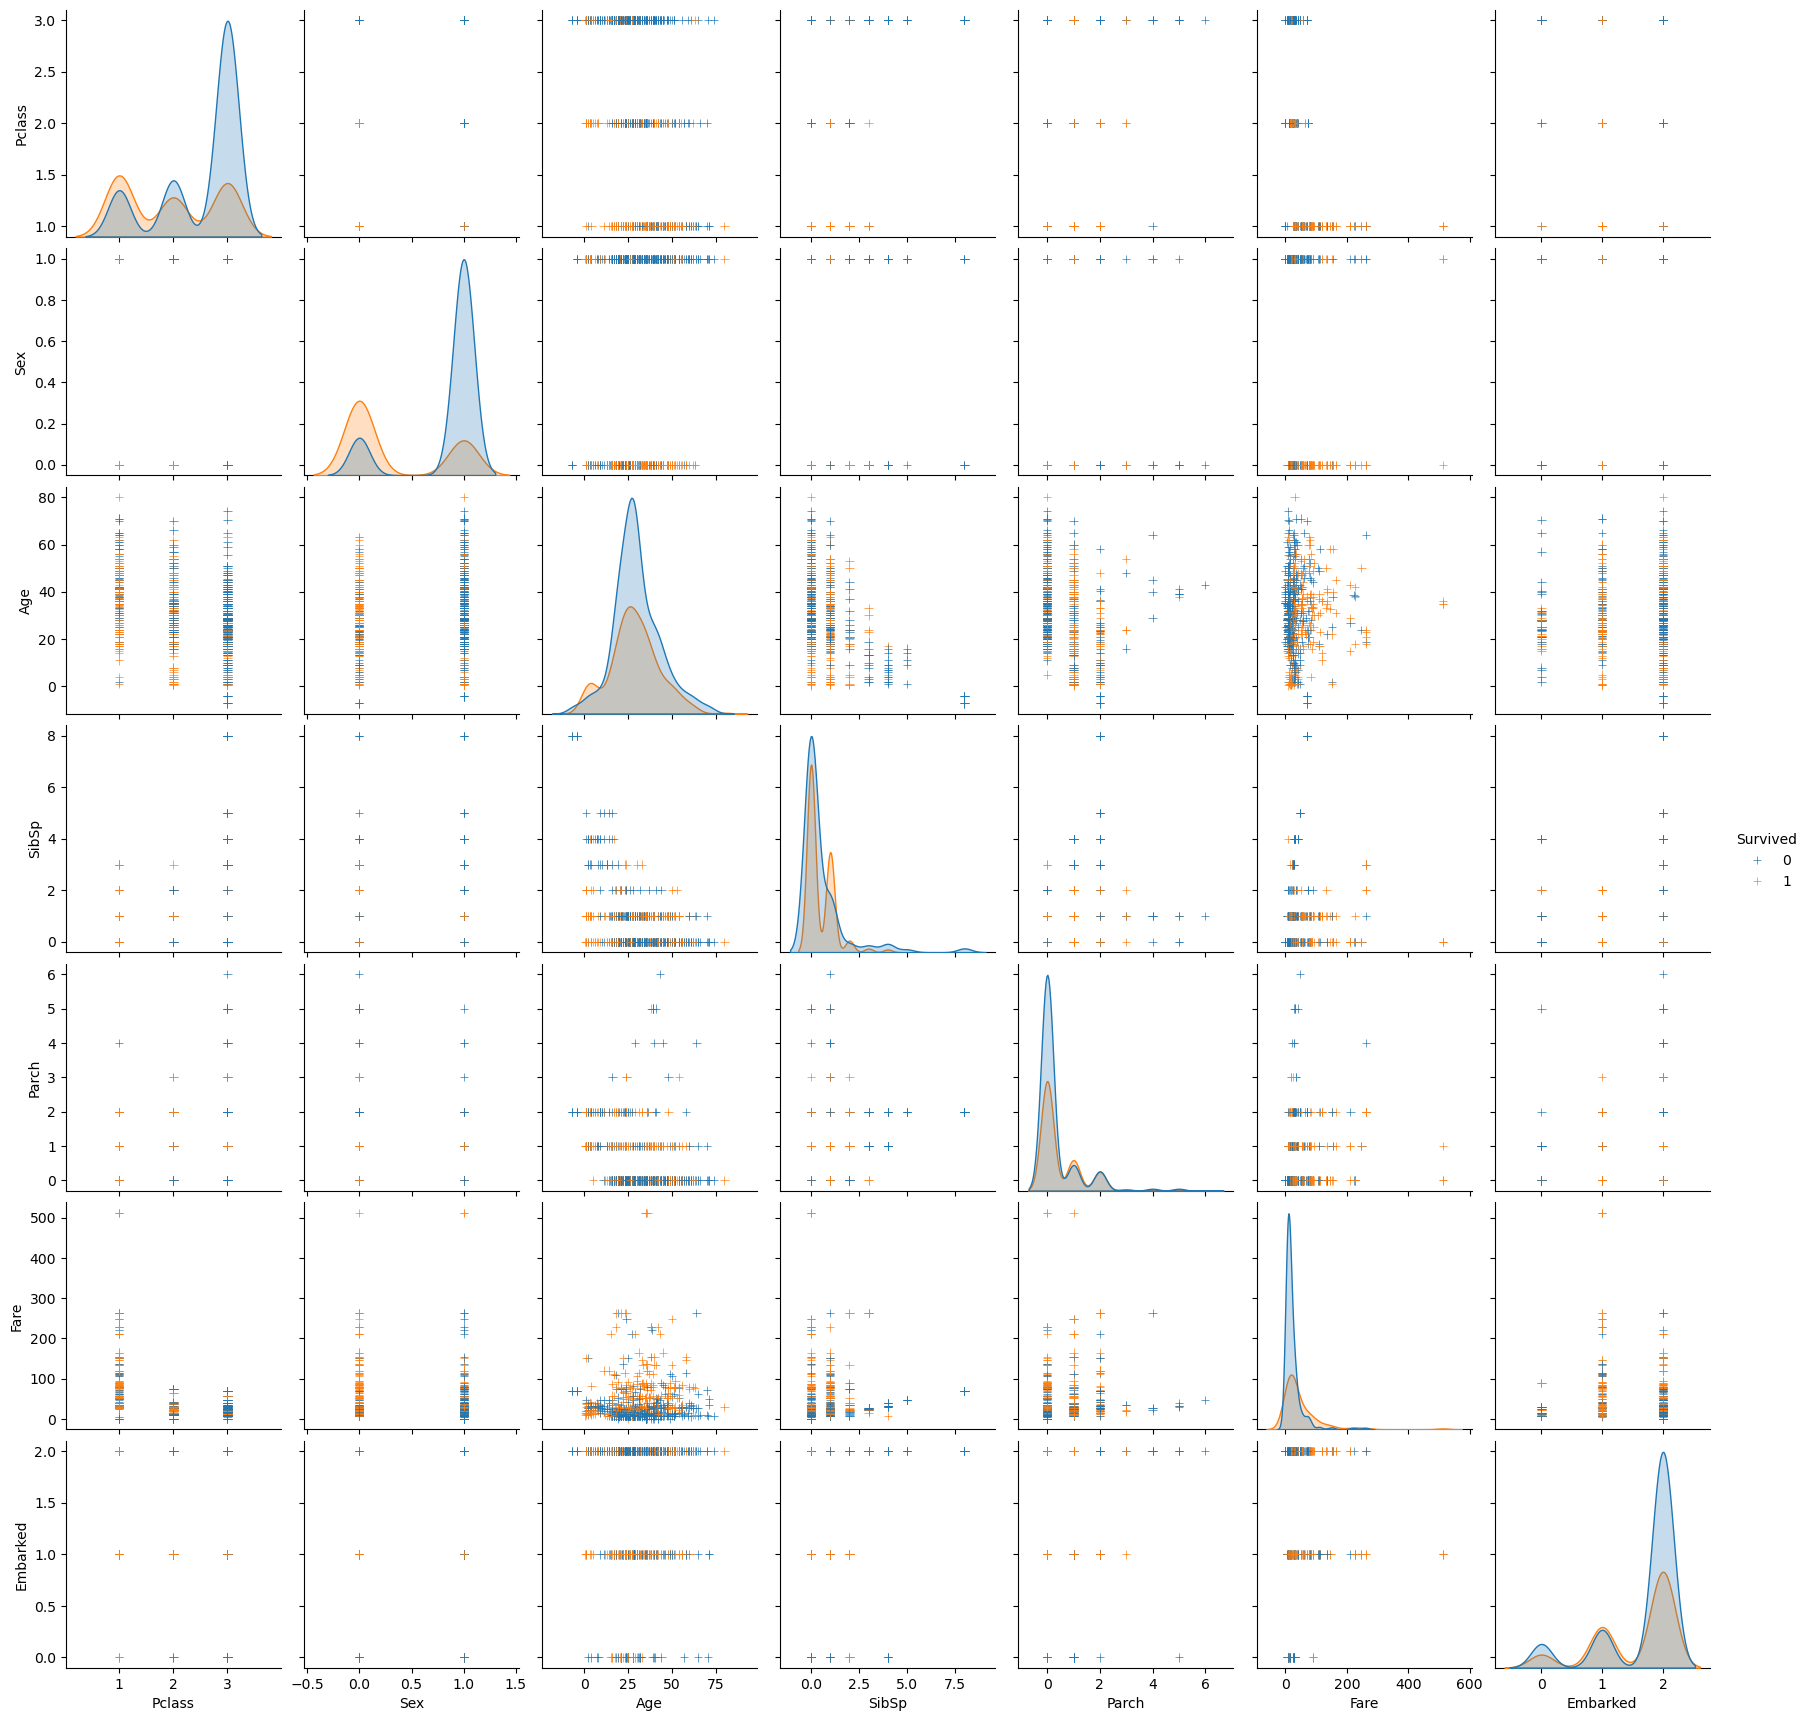

In [115]:
sns.pairplot(XX, hue="Survived", markers='+')

## <span style="color:red">Train your model (Classification)</span> 

In [117]:
X_train.drop(["PassengerId","Survived"],axis=1, inplace=True)
X_train.sample(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
109,3,0,20.98,1,0,24.15,0.0


In [118]:
X_test.drop(["PassengerId"],axis=1, inplace=True)
X_test.sample(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
89,2,1,2.0,1,1,23.0,2


In [119]:
y_train.drop(["PassengerId"],axis=1, inplace=True)
y_train.sample(1)

,Survived
649,1


In [120]:
y_test.drop(["PassengerId"],axis=1, inplace=True)
y_test.sample(1)

,Survived
366,0


## <span style="color:red ;font-size:40 ; font-weight:bold">Logistic Regression </span>


In [122]:
X_train_lr = X_train
y_train_lr = y_train
X_test_lr = X_test
y_test_lr = y_test
print(X_train_lr.shape)
print(y_train_lr.shape)
print(X_test_lr.shape)
print(y_test_lr.shape)

(891, 7)
(891, 1)
(418, 7)
(418, 1)


In [123]:
Logreg = LogisticRegression()
Logreg.fit(X_train_lr, y_train_lr)

LogisticRegression()

In [124]:
y_pred_lr = Logreg.predict(X_test_lr)

In [125]:
y_pred_lr

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [126]:
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_test_lr, y_pred_lr))

The accuracy of Logistic Regression is:  0.9354066985645934


In [127]:
X_test_lr.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [128]:
X_test_lr.sample(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
37,3,0,21.0,0,0,8.66,2


In [129]:
lab = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
values1 = [1, 0, 45, 0, 1, 13, 1]
values2 = [3, 0, 45, 0, 1, 13, 1]
df_1 = pd.DataFrame([values1], columns=lab)
df_2 = pd.DataFrame([values2], columns=lab)

In [130]:
print(Logreg.predict(df_1))
print(Logreg.predict(df_2))

[1]
[0]


In [131]:
print(confusion_matrix(y_test_lr,y_pred_lr))
print(classification_report(y_test_lr,y_pred_lr))

[[251  15]
 [ 12 140]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       266
           1       0.90      0.92      0.91       152

    accuracy                           0.94       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.94      0.94      0.94       418



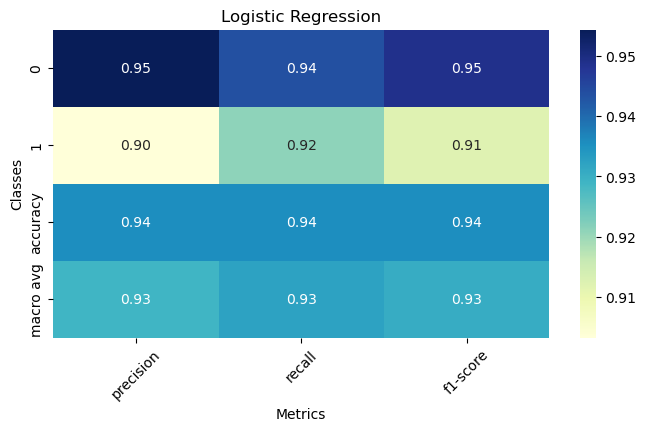

In [132]:
predictions_lr = Logreg.predict(X_test_lr)
report_lr = classification_report(y_test_lr, predictions_lr, output_dict=True)
report_lr = pd.DataFrame(report_lr).transpose()
metrics_lr = report_lr[['precision', 'recall', 'f1-score']]

plt.figure(figsize=(8, 4))
sns.heatmap(metrics_lr.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)
plt.title('Logistic Regression')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

## <span style="color:red ;font-size:40 ; font-weight:bold">KNN Regressor </span>


In [134]:
X_train_knn = X_train
y_train_knn = y_train
X_test_knn = X_test
y_test_knn = y_test
print(X_train_knn.shape)
print(y_train_knn.shape)
print(X_test_knn.shape)
print(y_test_knn.shape)

(891, 7)
(891, 1)
(418, 7)
(418, 1)


In [135]:
X_train_knn.sample(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
170,1,1,61.0,0,0,33.5,2.0


In [136]:
X_train_knn = X_train_knn.drop(['SibSp','Parch','Age','Embarked'],axis=1)
X_test_knn = X_test_knn.drop(['SibSp','Parch','Age','Embarked'],axis=1)

In [137]:
X_train_knn.sample(1)

,Pclass,Sex,Fare
328,3,0,20.52


In [138]:
X_test_knn.sample(1)

,Pclass,Sex,Fare
339,3,1,7.23


In [139]:
knn5 = KNeighborsClassifier() #k=5

In [140]:
knn5.fit(X_train_knn,y_train_knn)

KNeighborsClassifier()

In [141]:
y_pred_knn5 = knn5.predict(X_test_knn)

In [142]:
knn5.score(X_train_knn, y_train_knn)

0.835016835016835

In [143]:
knn5.score(X_test_knn, y_test_knn)

0.8205741626794258

In [144]:
print(classification_report(y_test_knn, y_pred_knn5))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       266
           1       0.75      0.76      0.75       152

    accuracy                           0.82       418
   macro avg       0.81      0.81      0.81       418
weighted avg       0.82      0.82      0.82       418



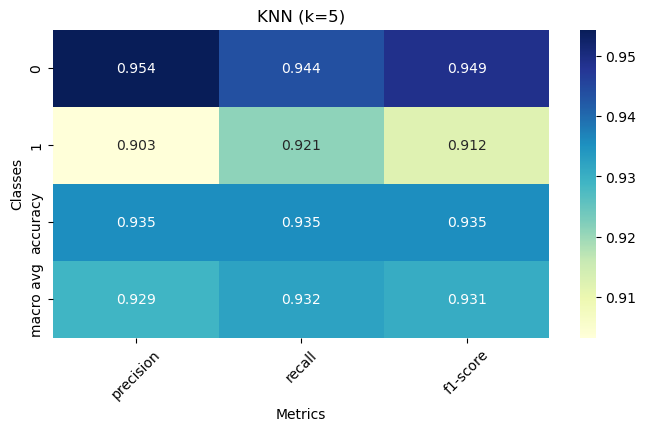

In [145]:
predictions_knn5 = knn5.predict(X_test_knn)
report_knn = classification_report(y_test_knn, predictions_knn5, output_dict=True)
report_knn = pd.DataFrame(report_knn).transpose()
metrics_knn = report_knn[['precision', 'recall', 'f1-score']]

plt.figure(figsize=(8, 4))
sns.heatmap(metrics_lr.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.3f', cbar=True)
plt.title('KNN (k=5)')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'KNN (k=5)')

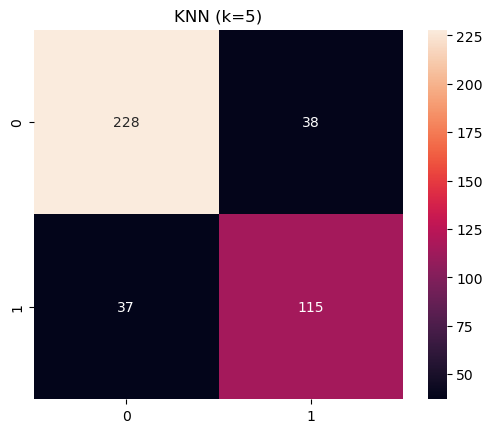

In [146]:
cm =confusion_matrix(y_test_knn, y_pred_knn5)
sns.heatmap(cm, square=True ,fmt='d', annot=True)
plt.title('KNN (k=5)')

In [147]:
error_rate = []
for i in range(1, 40):
    knn_ = KNeighborsClassifier(n_neighbors=i)
    knn_.fit(X_train_knn, y_train_knn)
    pred_i = knn_.predict(X_test_knn)

    # Ensure both are numpy arrays
    pred_i = np.array(pred_i)
    y_test_ = np.array(y_test_knn)

    # Check if dimensions match
    if pred_i.shape[0] != y_test.shape[0]:
        print(f"Dimension mismatch: pred_i has {pred_i.shape[0]} elements, y_test has {y_test_.shape[0]} elements.")
        continue  # Skip this iteration if there's a mismatch

    error_rate.append(np.mean(pred_i != y_test_))   

Text(0, 0.5, 'Error Rate')

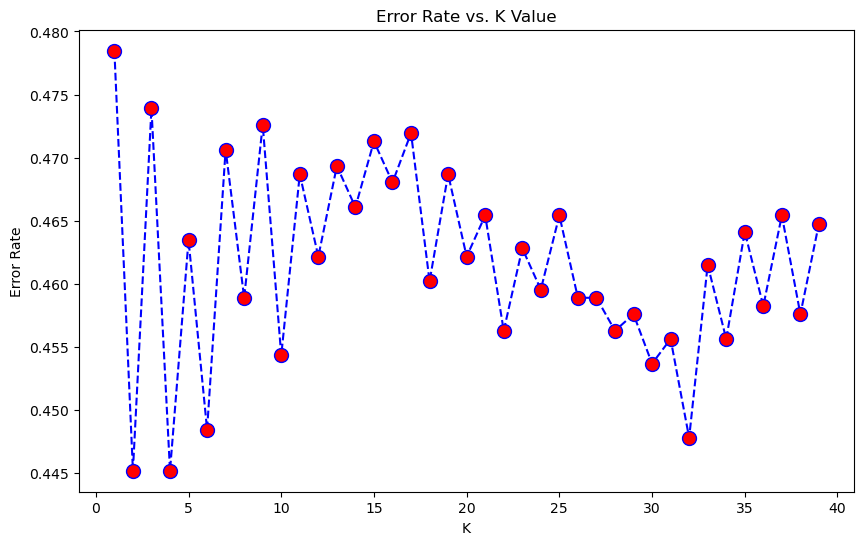

In [148]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [149]:
knn2 = KNeighborsClassifier(n_neighbors=2)

In [150]:
knn2.fit(X_train_knn,y_train)

KNeighborsClassifier(n_neighbors=2)

In [151]:
y_pred_knn2 = knn2.predict(X_test_knn)

In [152]:
knn2.score(X_train_knn, y_train_knn)

0.8417508417508418

In [153]:
knn2.score(X_test_knn, y_test_knn)

0.7822966507177034

In [154]:
print(classification_report(y_test_knn, y_pred_knn2))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       266
           1       0.74      0.61      0.67       152

    accuracy                           0.78       418
   macro avg       0.77      0.75      0.75       418
weighted avg       0.78      0.78      0.78       418



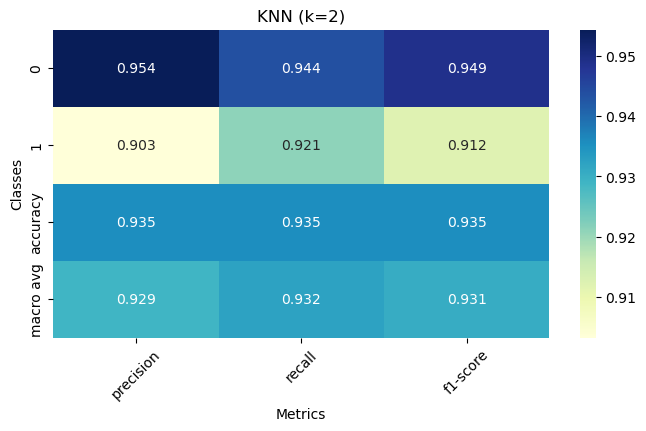

In [155]:
predictions_knn2 = knn2.predict(X_test_knn)
report_knn = classification_report(y_test_knn, predictions_knn2, output_dict=True)
report_knn = pd.DataFrame(report_knn).transpose()
metrics_knn = report_knn[['precision', 'recall', 'f1-score']]

plt.figure(figsize=(8, 4))
sns.heatmap(metrics_lr.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.3f', cbar=True)
plt.title('KNN (k=2)')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'KNN (k=2)')

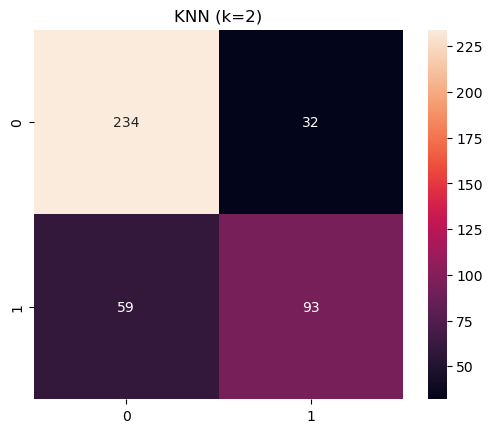

In [156]:
cm =confusion_matrix(y_test_knn, y_pred_knn2)
sns.heatmap(cm, square=True , fmt='d',annot=True)
plt.title('KNN (k=2)')

In [157]:
knn4 = KNeighborsClassifier(n_neighbors=4)

In [158]:
knn4.fit(X_train_knn,y_train_knn)

KNeighborsClassifier(n_neighbors=4)

In [159]:
y_pred_knn4 = knn4.predict(X_test_knn)

In [160]:
knn4.score(X_train_knn, y_train_knn)

0.8428731762065096

In [161]:
knn4.score(X_test_knn, y_test_knn)

0.80622009569378

In [162]:
print(classification_report(y_test_knn, y_pred_knn4))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       266
           1       0.78      0.64      0.71       152

    accuracy                           0.81       418
   macro avg       0.80      0.77      0.78       418
weighted avg       0.80      0.81      0.80       418



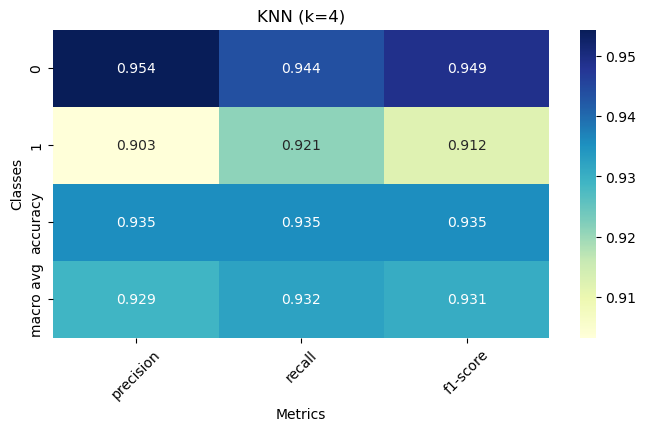

In [163]:
predictions_knn4 = knn5.predict(X_test_knn)
report_knn = classification_report(y_test_knn, predictions_knn4, output_dict=True)
report_knn = pd.DataFrame(report_knn).transpose()
metrics_knn = report_knn[['precision', 'recall', 'f1-score']]

plt.figure(figsize=(8, 4))
sns.heatmap(metrics_lr.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.3f', cbar=True)
plt.title('KNN (k=4)')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'KNN (k=4)')

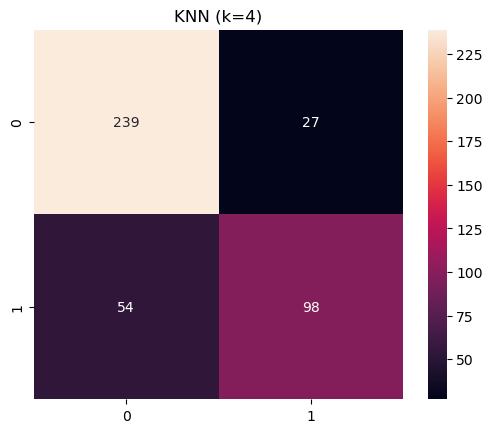

In [164]:
cm =confusion_matrix(y_test_knn, y_pred_knn4)
sns.heatmap(cm, square=True ,fmt='d', annot=True)
plt.title('KNN (k=4)')

In [165]:
knn6 = KNeighborsClassifier(n_neighbors=6)

In [166]:
knn6.fit(X_train_knn,y_train_knn)

KNeighborsClassifier(n_neighbors=6)

In [167]:
y_pred_knn6 = knn6.predict(X_test_knn)

In [168]:
knn6.score(X_train_knn, y_train_knn)

0.8294051627384961

In [169]:
knn6.score(X_test_knn, y_test_knn)

0.8038277511961722

In [170]:
print(classification_report(y_test_knn, y_pred_knn6))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       266
           1       0.77      0.66      0.71       152

    accuracy                           0.80       418
   macro avg       0.79      0.77      0.78       418
weighted avg       0.80      0.80      0.80       418



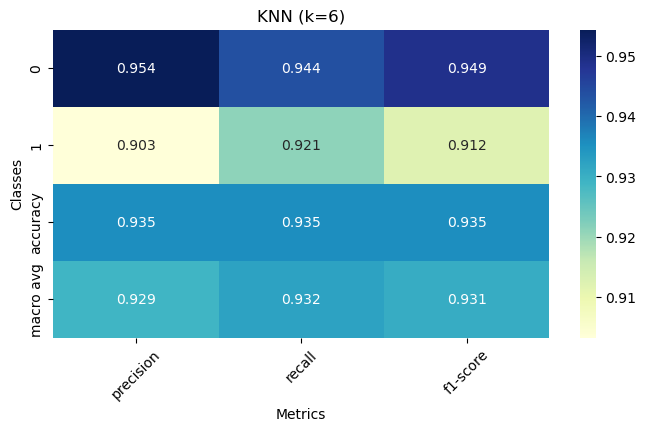

In [171]:
predictions_knn6 = knn6.predict(X_test_knn)
report_knn = classification_report(y_test_knn, predictions_knn6, output_dict=True)
report_knn = pd.DataFrame(report_knn).transpose()
metrics_knn = report_knn[['precision', 'recall', 'f1-score']]

plt.figure(figsize=(8, 4))
sns.heatmap(metrics_lr.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.3f', cbar=True)
plt.title('KNN (k=6)')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'KNN (k=6)')

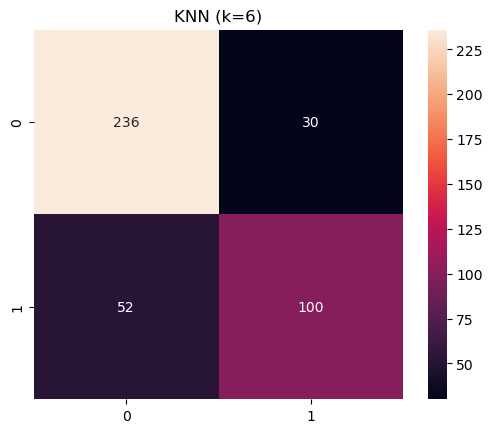

In [172]:
cm =confusion_matrix(y_test_knn, y_pred_knn6)
sns.heatmap(cm, square=True ,fmt='d', annot=True)
plt.title('KNN (k=6)')

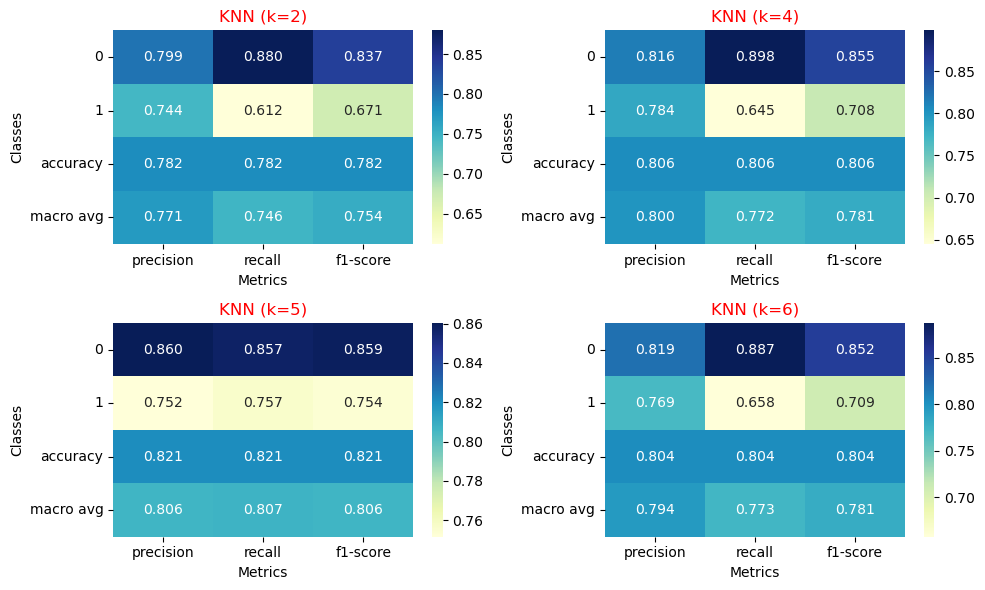

In [173]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

predictions_knn2 = knn2.predict(X_test_knn)
report_knn = classification_report(y_test_knn, predictions_knn2, output_dict=True)
report_knn = pd.DataFrame(report_knn).transpose()
metrics_knn = report_knn[['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_knn.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.3f', cbar=True, ax=axs[0, 0])
axs[0, 0].set_title('KNN (k=2)',color='red')
axs[0, 0].set_ylabel('Classes')
axs[0, 0].set_xlabel('Metrics')

predictions_knn4 = knn4.predict(X_test_knn)
report_knn = classification_report(y_test_knn, predictions_knn4, output_dict=True)
report_knn = pd.DataFrame(report_knn).transpose()
metrics_knn = report_knn[['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_knn.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.3f', cbar=True, ax=axs[0, 1])
axs[0, 1].set_title('KNN (k=4)',color='red')
axs[0, 1].set_ylabel('Classes')
axs[0, 1].set_xlabel('Metrics')

predictions_knn5 = knn5.predict(X_test_knn)
report_knn = classification_report(y_test_knn, predictions_knn5, output_dict=True)
report_knn = pd.DataFrame(report_knn).transpose()
metrics_knn = report_knn[['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_knn.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.3f', cbar=True, ax=axs[1, 0])
axs[1, 0].set_title('KNN (k=5)',color='red')
axs[1, 0].set_ylabel('Classes')
axs[1, 0].set_xlabel('Metrics')

predictions_knn6 = knn6.predict(X_test_knn)
report_knn = classification_report(y_test_knn, predictions_knn6, output_dict=True)
report_knn = pd.DataFrame(report_knn).transpose()
metrics_knn = report_knn[['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_knn.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.3f', cbar=True, ax=axs[1, 1])
axs[1, 1].set_title('KNN (k=6)',color='red')
axs[1, 1].set_ylabel('Classes')
axs[1, 1].set_xlabel('Metrics')

plt.tight_layout()
plt.show()

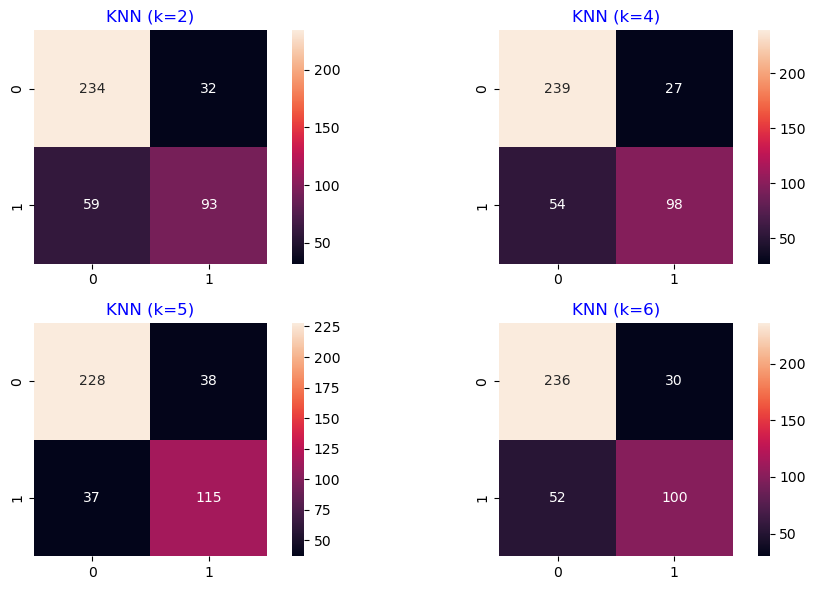

In [174]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

cm = confusion_matrix(y_test_knn, y_pred_knn2)
sns.heatmap(cm, square=True, annot=True, fmt='d', ax=axs[0, 0])
axs[0, 0].set_title('KNN (k=2)', color = 'blue')

cm = confusion_matrix(y_test_knn, y_pred_knn4)
sns.heatmap(cm, square=True, annot=True,fmt='d', ax=axs[0, 1])
axs[0, 1].set_title('KNN (k=4)', color = 'blue')

cm = confusion_matrix(y_test_knn, y_pred_knn5)
sns.heatmap(cm, square=True, annot=True,fmt='d', ax=axs[1, 0])
axs[1, 0].set_title('KNN (k=5)', color = 'blue')

cm = confusion_matrix(y_test_knn, y_pred_knn6)
sns.heatmap(cm, square=True, annot=True,fmt='d', ax=axs[1, 1])
axs[1, 1].set_title('KNN (k=6)', color = 'blue')

plt.tight_layout()
plt.show()

## <span style="color:red ;font-size:40 ; font-weight:bold">Decision Tree </span>


In [176]:
X_train_dt = X_train
y_train_dt = y_train
X_test_dt = X_test
y_test_dt = y_test
print(X_train_dt.shape)
print(y_train_dt.shape)
print(X_test_dt.shape)
print(y_test_dt.shape)

(891, 7)
(891, 1)
(418, 7)
(418, 1)


In [177]:
X_train_dt = X_train_dt.drop(['SibSp','Parch','Age','Embarked'],axis=1)
X_test_dt = X_test_dt.drop(['SibSp','Parch','Age','Embarked'],axis=1)

In [178]:
X_train_dt.sample(1)

,Pclass,Sex,Fare
562,2,1,13.5


In [179]:
X_test_dt.sample(1)

,Pclass,Sex,Fare
125,3,0,16.1


In [180]:
sc = StandardScaler()
X_train_dt = sc.fit_transform(X_train_dt)
X_test_dt = sc.fit_transform(X_test_dt)

In [181]:
classifier_dt = DecisionTreeClassifier(criterion='entropy' , random_state = 31)
classifier_dt.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(criterion='entropy', random_state=31)

In [182]:
lab = ['Pclass', 'Sex', 'Fare']
values1 = [1, 1, 50]
values2 = [3, 0, 13]
df_1 = pd.DataFrame([values1], columns=lab)
df_2 = pd.DataFrame([values2], columns=lab)

In [183]:
print(classifier_dt.predict(sc.transform(df_1)))
print(classifier_dt.predict(sc.transform(df_2)))

[0]
[1]


In [184]:
y_pred_dt = classifier_dt.predict(X_test_dt)

In [185]:
cm = confusion_matrix(y_test_dt, y_pred_dt)
print(cm)
accuracy_score(y_test_dt, y_pred_dt)

[[238  28]
 [ 36 116]]


0.84688995215311

In [186]:
print(classification_report(y_test_dt, y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       266
           1       0.81      0.76      0.78       152

    accuracy                           0.85       418
   macro avg       0.84      0.83      0.83       418
weighted avg       0.85      0.85      0.85       418



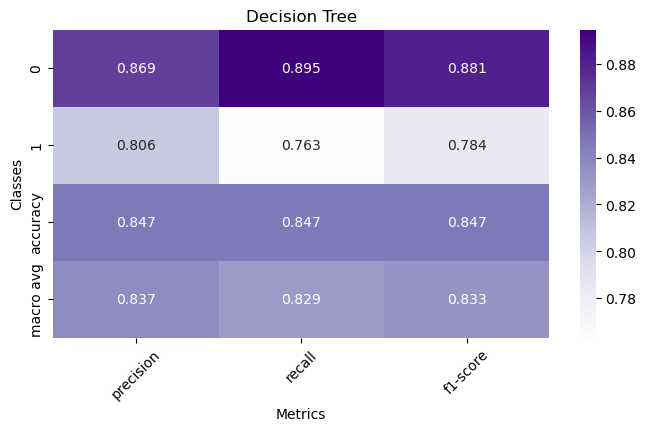

In [187]:
predictions_dt = classifier_dt.predict(X_test_dt)
report = classification_report(y_test_dt, predictions_dt, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='Purples', fmt='.3f', cbar=True)
plt.title('Decision Tree')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

## <span style="color:red ;font-size:40 ; font-weight:bold">Random Forest </span>


In [189]:
X_train.sample(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
725,3,1,20.0,0,0,8.66,2.0


In [190]:
sc = StandardScaler()
X_train_rf = sc.fit_transform(X_train)
X_test_rf = sc.fit_transform(X_test)
y_train_rf = y_train
y_test_rf = y_test

In [191]:
X_train_rf[0]

array([ 0.82737724,  0.73769513, -0.53346417,  0.43279337, -0.47367361,
       -0.5024485 ,  0.56883712])

In [192]:
rfc = RandomForestClassifier(criterion='entropy' , random_state=35)
rfc.fit(X_train_rf, y_train)

y_pred_rf = rfc.predict(X_train_rf)
print(f'Training set evaluation F1-Score : {f1_score(y_train,y_pred_rf)}')

Training set evaluation F1-Score : 0.9748892171344166


In [193]:
y_pred_rf = rfc.predict(X_test_rf)
print(f'Testing Set Evaluation F1-Score : {f1_score(y_test,y_pred_rf)}')

Testing Set Evaluation F1-Score : 0.7536231884057971


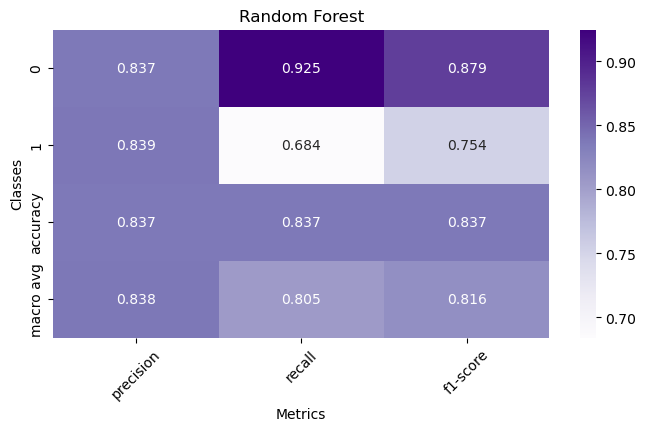

In [194]:
predictions_rf = rfc.predict(X_test_rf)
report = classification_report(y_test_rf, predictions_rf, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='Purples', fmt='.3f', cbar=True)
plt.title('Random Forest')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

In [195]:
rfc.feature_importances_

array([0.07212549, 0.21194316, 0.30506049, 0.05019865, 0.03843825,
       0.28873181, 0.03350215])

In [196]:
X.sample(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
817,818,0,2,1,31.0,1,1,37.0,1.0


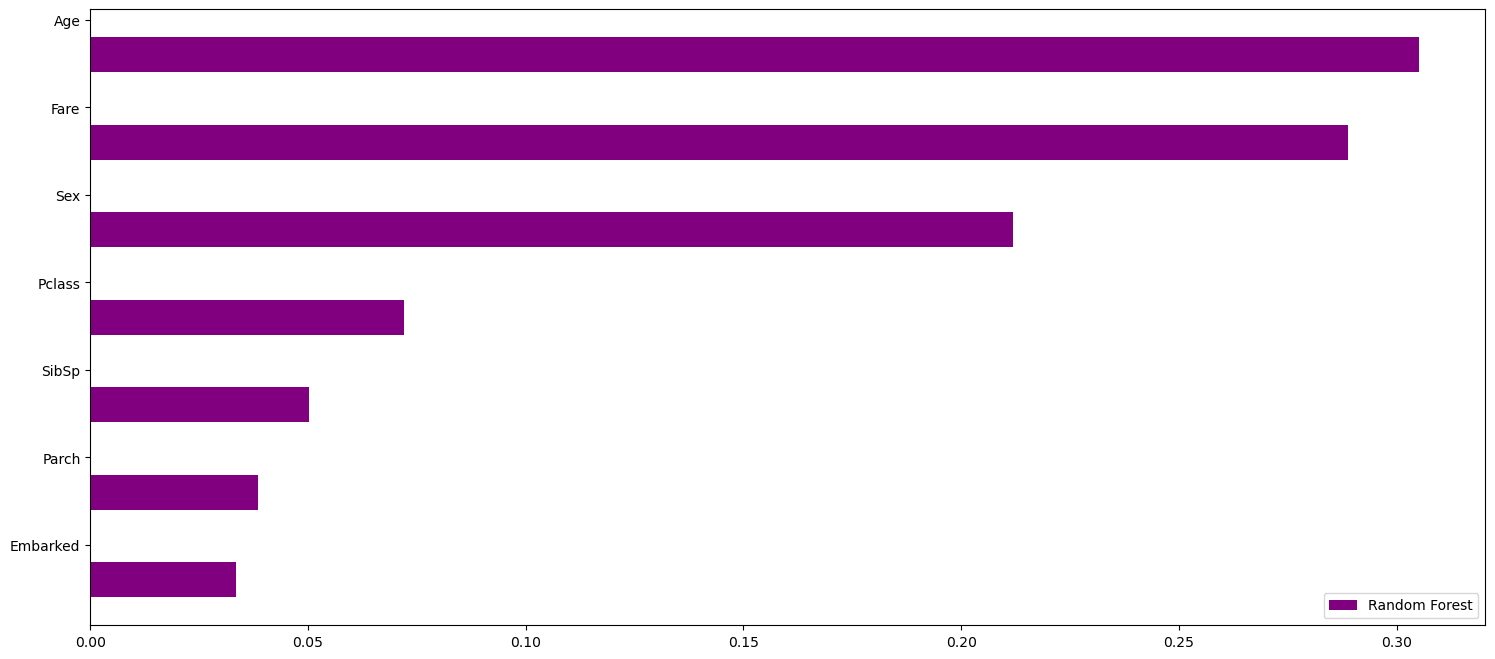

In [197]:
feature_importance=pd.DataFrame({'rfc':rfc.feature_importances_},index=X.drop(columns=['PassengerId','Survived']).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

In [198]:
X_train_rf_ = X_train.drop(['Pclass','SibSp','Parch','Embarked'],axis=1)
X_test_rf_ = X_test.drop(['Pclass','SibSp','Parch','Embarked'],axis=1)

In [199]:
X_train_rf_

,Sex,Age,Fare
0,1,22.00,7.25
1,0,38.00,71.28
2,0,26.00,7.92
3,0,35.00,53.10
4,1,35.00,8.05
...,...,...,...
886,1,27.00,13.00
887,0,19.00,30.00
888,0,19.77,23.45
889,1,26.00,30.00


In [200]:
sc = StandardScaler()
X_train_rf_ = sc.fit_transform(X_train_rf_)
X_test_rf_ = sc.fit_transform(X_test_rf_)

In [201]:
rfc_ = RandomForestClassifier(criterion='entropy' , random_state=35)
rfc_.fit(X_train_rf_, y_train_rf)

y_pred_rf_ = rfc_.predict(X_train_rf_)
print(f'Training set evaluation F1-Score : {f1_score(y_train_rf,y_pred_rf_)}')

Training set evaluation F1-Score : 0.9733727810650887


In [202]:
y_pred_rf_ = rfc_.predict(X_test_rf_)
print(f'Testing Set Evaluation F1-Score : {f1_score(y_test_rf,y_pred_rf_)}')

Testing Set Evaluation F1-Score : 0.7985865724381626


In [203]:
print(confusion_matrix(y_test_rf,y_pred_rf_))
print(classification_report(y_test_rf,y_pred_rf_))

[[248  18]
 [ 39 113]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       266
           1       0.86      0.74      0.80       152

    accuracy                           0.86       418
   macro avg       0.86      0.84      0.85       418
weighted avg       0.86      0.86      0.86       418



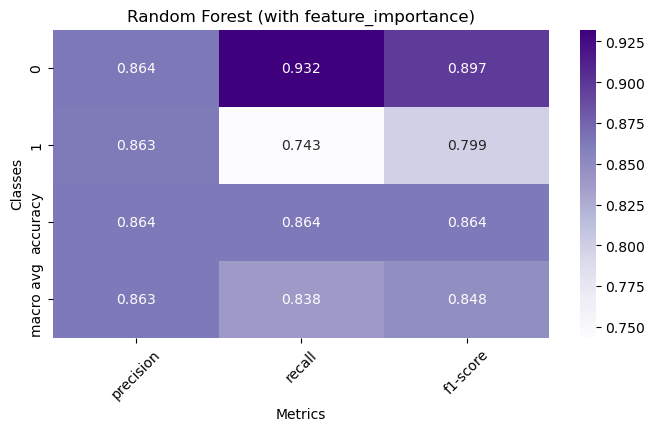

In [204]:
predictions_rf_ = rfc_.predict(X_test_rf_)
report = classification_report(y_test_rf, predictions_rf_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='Purples', fmt='.3f', cbar=True)
plt.title('Random Forest (with feature_importance)')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

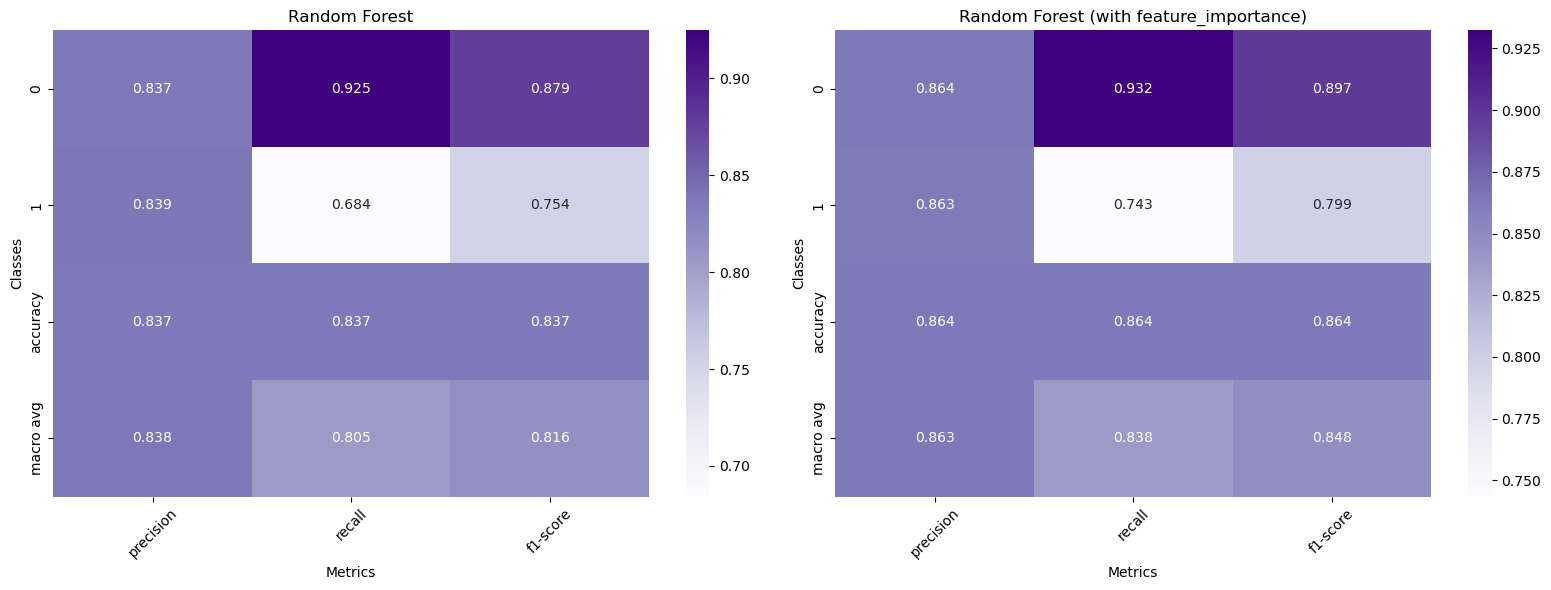

In [205]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

predictions_rf = rfc.predict(X_test_rf)
report = classification_report(y_test_rf, predictions_rf, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='Purples', fmt='.3f', cbar=True, ax=axs[0])
axs[0].set_title('Random Forest')
axs[0].set_ylabel('Classes')
axs[0].set_xlabel('Metrics')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)

predictions_rf_ = rfc_.predict(X_test_rf_)
report = classification_report(y_test_rf, predictions_rf_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='Purples', fmt='.3f', cbar=True, ax=axs[1])
axs[1].set_title('Random Forest (with feature_importance)')
axs[1].set_ylabel('Classes')
axs[1].set_xlabel('Metrics')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## <span style="color:red ;font-size:40 ; font-weight:bold">SVM </span>


In [207]:
X_train_svc = X_train.drop(['Pclass','SibSp','Parch','Embarked'],axis=1)
X_test_svc = X_test.drop(['Pclass','SibSp','Parch','Embarked'],axis=1)
y_train_svc = y_train
y_test_svc = y_test

In [208]:
sc = StandardScaler()
X_train_svc = sc.fit_transform(X_train_svc)
X_test_svc = sc.fit_transform(X_test_svc)

In [209]:
svclassifier_lin = SVC(kernel='linear')  #kernel='rbf'
svclassifier_lin.fit(X_train_svc, y_train_svc)

SVC(kernel='linear')

In [210]:
y_pred_svc_lin = svclassifier_lin.predict(X_test_svc)

In [211]:
accuracy = accuracy_score(y_test, y_pred_svc_lin) * 100
print(f'Accuracy is : {accuracy}')

Accuracy is : 100.0


In [212]:
y_pred_svc_lin.shape

(418,)

In [213]:
y_test.shape

(418, 1)

In [214]:
#y_test_svc = y_test_svc.ravel()

In [215]:
y_test_svc.shape

(418, 1)

In [216]:
#pd.crosstab(y_test_svc, y_pred_svc_lin)

In [217]:
print(confusion_matrix(y_test_svc,y_pred_svc_lin))
print(classification_report(y_test_svc,y_pred_svc_lin))

[[266   0]
 [  0 152]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [218]:
svclassifier_rbf = SVC(kernel='rbf')  #kernel='linear'
svclassifier_rbf.fit(X_train_svc, y_train_svc)

SVC()

In [219]:
y_pred_svc_rbf = svclassifier_rbf.predict(X_test_svc)

In [220]:
accuracy_svc_rbf = accuracy_score(y_test, y_pred_svc_rbf) * 100
print(f'Accuracy is : {accuracy_svc_rbf}')

Accuracy is : 99.28229665071771


In [221]:
#pd.crosstab(y_test_svc, y_pred_svc_rbf)

In [222]:
print(confusion_matrix(y_test_svc,y_pred_svc_rbf))
print(classification_report(y_test_svc,y_pred_svc_rbf))

[[263   3]
 [  0 152]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       266
           1       0.98      1.00      0.99       152

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



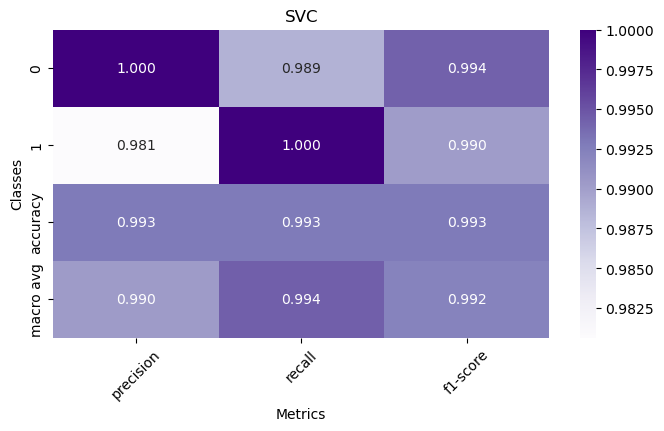

In [223]:
predictions_svc = svclassifier_rbf.predict(X_test_svc)
report = classification_report(y_test_svc, predictions_svc, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='Purples', fmt='.3f', cbar=True)
plt.title('SVC')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

## <span style="color:red ;font-size:40 ; font-weight:bold">XGBoos </span>

In [225]:
X_train_xgb = X_train
X_test_xgb = X_test
y_train_xgb = y_train
y_test_xgb = y_test

In [226]:
xgb = XGBClassifier()
xgb.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [227]:
y_pred_xgb = xgb.predict(X_test_xgb)

In [228]:
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb) * 100
print(f'Accuracy is : {accuracy_xgb}')

Accuracy is : 84.21052631578947


In [229]:
#pd.crosstab(y_test_xgb.ravel(), y_pred_xgb)

In [230]:
print(confusion_matrix(y_test_xgb,y_pred_xgb))
print(classification_report(y_test_xgb,y_pred_xgb))

[[238  28]
 [ 38 114]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       266
           1       0.80      0.75      0.78       152

    accuracy                           0.84       418
   macro avg       0.83      0.82      0.83       418
weighted avg       0.84      0.84      0.84       418



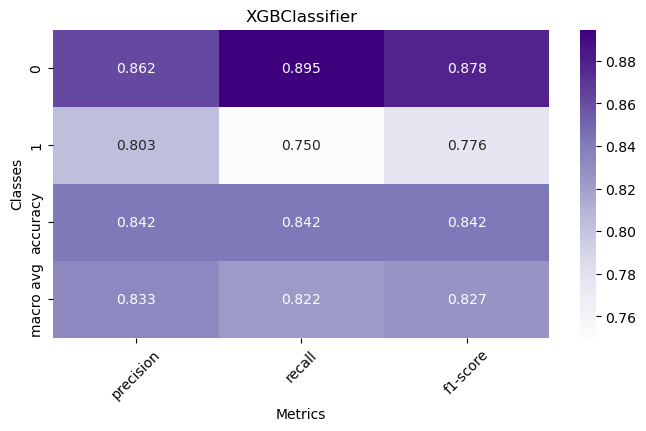

In [231]:
predictions_xgb = xgb.predict(X_test_xgb)
report = classification_report(y_test_xgb, predictions_xgb, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='Purples', fmt='.3f', cbar=True)
plt.title('XGBClassifier')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

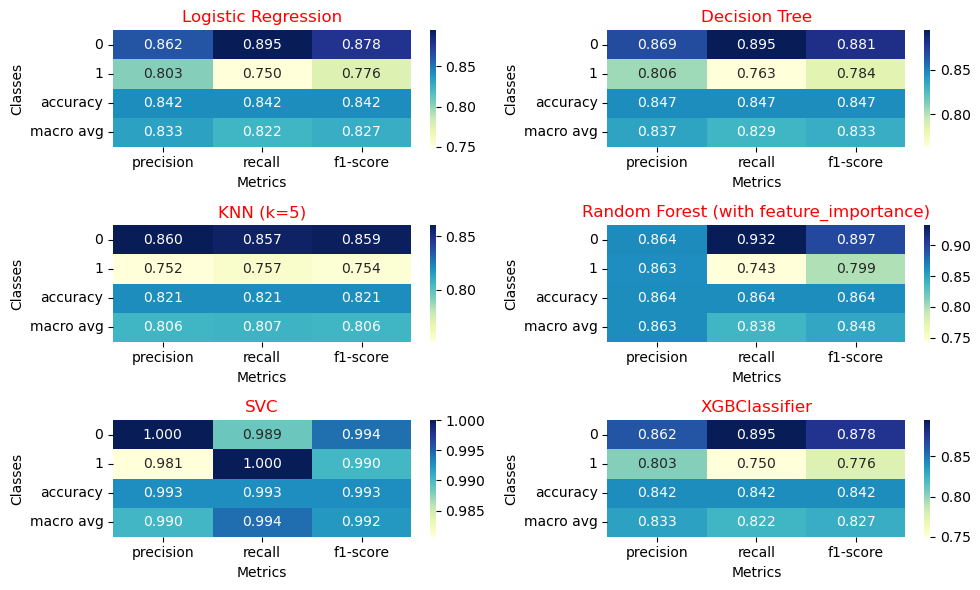

In [232]:
fig, axs = plt.subplots(3, 2, figsize=(10, 6))

predictions_lr = Logreg.predict(X_test_lr)
report_lr = classification_report(y_test_lr, predictions_lr, output_dict=True)
report_lr = pd.DataFrame(report_lr).transpose()
metrics_lr = report_lr[['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.3f', cbar=True, ax=axs[0, 0])
axs[0, 0].set_title('Logistic Regression',color='red')
axs[0, 0].set_ylabel('Classes')
axs[0, 0].set_xlabel('Metrics')

predictions_dt = classifier_dt.predict(X_test_dt)
report = classification_report(y_test_dt, predictions_dt, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.3f', cbar=True, ax=axs[0, 1])
axs[0, 1].set_title('Decision Tree',color='red')
axs[0, 1].set_ylabel('Classes')
axs[0, 1].set_xlabel('Metrics')

predictions_knn5 = knn5.predict(X_test_knn)
report_knn = classification_report(y_test_knn, predictions_knn5, output_dict=True)
report_knn = pd.DataFrame(report_knn).transpose()
metrics_knn = report_knn[['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_knn.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.3f', cbar=True, ax=axs[1, 0])
axs[1, 0].set_title('KNN (k=5)',color='red')
axs[1, 0].set_ylabel('Classes')
axs[1, 0].set_xlabel('Metrics')

predictions_rf_ = rfc_.predict(X_test_rf_)
report = classification_report(y_test_rf, predictions_rf_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.3f', cbar=True, ax=axs[1, 1])
axs[1, 1].set_title('Random Forest (with feature_importance)',color='red')
axs[1, 1].set_ylabel('Classes')
axs[1, 1].set_xlabel('Metrics')

predictions_svc = svclassifier_rbf.predict(X_test_svc)
report = classification_report(y_test_svc, predictions_svc, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.3f', cbar=True, ax=axs[2, 0])
axs[2, 0].set_title('SVC',color='red')
axs[2, 0].set_ylabel('Classes')
axs[2, 0].set_xlabel('Metrics')

predictions_xgb = xgb.predict(X_test_xgb)
report = classification_report(y_test_xgb, predictions_xgb, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.3f', cbar=True, ax=axs[2, 1])
axs[2, 1].set_title('XGBClassifier',color='red')
axs[2, 1].set_ylabel('Classes')
axs[2, 1].set_xlabel('Metrics')

plt.tight_layout()
plt.show()